In [2]:
import pandas as pd

data = pd.read_excel('最终数据.xls')

In [3]:
data

,商铺名称,类型,评分,评论,人均消费（单位：￥）,效果,环境,服务,城市线级,类型_种类标签,地点,店铺地址,当地地址
0,椒王火锅(海口店),重庆火锅,4.93,11321,98,4.93,4.93,4.93,3,0,海口,万达广场,224国道万达广场3072-3073
1,313羊庄原生态火锅(凤翔路直营店),牛羊肉火锅,4.92,1372,91,4.91,4.90,4.91,3,1,海口,高铁东站/凤翔路,保翔东路122号希尔悦酒都2F313羊庄（原蓝海迎宾大酒都）
2,海底捞火锅(友谊阳光城店),四川火锅,4.86,1308,120,4.85,4.85,4.86,3,2,海口,新友谊阳光城,金巷路2号友谊阳光城五层5022号
3,海底捞火锅(望海国际广场店),四川火锅,4.86,1027,118,4.85,4.86,4.86,3,2,海口,望海国际广场,海秀东路6号望海国际广场1号楼6层11号
4,海底捞火锅(宜欣城店),四川火锅,4.86,1388,124,4.86,4.86,4.87,3,2,海口,宜欣广场,明珠路8号宜欣城四层
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,御品港式肥牛海鲜火锅(虹桥店),海鲜火锅,4.93,397,893,4.92,4.87,4.88,5,6,阿勒泰,虹桥/古北,虹桥路1665号C8
3003,海底捞火锅(长宁龙之梦店),四川火锅,4.92,3796,142,4.94,4.94,4.94,5,2,阿勒泰,中山公园/江苏路,长较路1018号巷之梦8楼8190号蓝中庭
3004,捞王锅物料理(BFC外滩金融中心店),猪肚鸡火锅,4.92,2003,156,4.93,4.94,4.91,5,9,阿勒泰,外滩,中山东二路588号BFC1滩金融中心南区S414a室（地铁9号线小南门3号口）
3005,乌鱼馆,鱼火锅,4.44,44,97,4.44,4.43,4.44,5,8,阿里,札达县其他,帕拉路李记高原生态汤锅隔壁


In [4]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import math

In [5]:
data3 =data[data['城市线级'] == 3]
data4 =data[data['城市线级'] == 4]
data5 =data[data['城市线级'] == 5]

In [6]:
data3.columns

Index(['商铺名称', '类型', '评分', '评论', '人均消费（单位：￥）', '效果', '环境', '服务', '城市线级',
       '类型_种类标签', '地点', '店铺地址', '当地地址'],
      dtype='object')

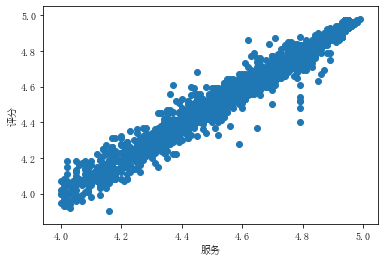

In [41]:
#-*- coding: utf-8 -*- 1
import matplotlib
matplotlib.rc("font",family='YouYuan')
plt.scatter(data['评分'] ,data['服务']) #mpg燃料效率；acceleration汽车的加速性能
plt.xlabel('服务')
plt.ylabel('评分')#设置坐标轴标签
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression   #引入多元线性回归算法模块进行相应的训练
simple2=LinearRegression( normalize= True)
from sklearn.model_selection import train_test_split
x = data3.iloc[:,5:8]
y = data3['评分']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=6)
simple2.fit(x_train,y_train)
print(simple2.coef_)               #输出多元线性回归的各项系数
print(simple2.intercept_)          #输出多元线性回归的常数项的值
y_predict=simple2.predict(x_test)

[8.05899755e-01 1.37050814e-04 1.94850898e-01]
-0.0009326623213290475


大众点评-三线城市的回归方程：

```y = 0.80488077*X1 + 1.37050814e-04*X2 +1.94850898e-01*X3 -0.0009326623213290475```

In [23]:
from sklearn import metrics

mse=metrics.mean_absolute_error(y_test,y_predict)
rmse=np.sqrt(mse)
print("mse（（均方误差）） = {}".format(mse))
print("rmse（均方根误差） = {}".format(rmse))

ssr=((y_predict-y_train.mean())**2).sum()
sst=((y_train-y_train.mean())**2).sum()
r2=ssr/sst
print("R-square(相关系数) = {}".format(r2))
#r2的另一种算法,通常用这种方法
r2=simple2.score(x_train,y_train)
print("准确率 = {}".format(r2))

mse（（均方误差）） = 0.012379329833184982
rmse（均方根误差） = 0.11126243675735753
R-square(相关系数) = 0.3753915511944441
准确率 = 0.9788544203153001


In [32]:
from sklearn.linear_model import LinearRegression   #引入多元线性回归算法模块进行相应的训练
simple2=LinearRegression()
from sklearn.model_selection import train_test_split
x = data4.iloc[:,5:8]
y = data4['评分']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6)
simple2.fit(x_train,y_train)
print(simple2.coef_)               #输出多元线性回归的各项系数
print(simple2.intercept_)          #输出多元线性回归的常数项的值
y_predict=simple2.predict(x_test)

[ 0.54672989 -0.02741371  0.47498332]
0.03234391564943806


大众点评-四线城市的回归方程：

```Y = 0.54672989*X3 + 0.02741371*X2 +  0.47498332*X1 + 0.03234391564943806```

In [30]:
from sklearn.linear_model import LinearRegression   #引入多元线性回归算法模块进行相应的训练
simple2=LinearRegression(normalize= True)
from sklearn.model_selection import train_test_split
x = data5.iloc[:,5:8]
y = data5['评分']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6)
simple2.fit(x_train,y_train)
print(simple2.coef_)               #输出多元线性回归的各项系数
print(simple2.intercept_)          #输出多元线性回归的常数项的值
y_predict=simple2.predict(x_test)

[0.72595175 0.00574825 0.25718874]
0.05553013858994493


大众点评-五线城市的回归方程：

```Y = 0.725951758X3 + 0.00574825*X2 +0.25718874*X1 + 0.0555301385899449```

In [33]:
from sklearn import metrics

mse=metrics.mean_absolute_error(y_test,y_predict)
rmse=np.sqrt(mse)
print("mse（（均方误差）） = {}".format(mse))
print("rmse（均方根误差） = {}".format(rmse))

ssr=((y_predict-y_train.mean())**2).sum()
sst=((y_train-y_train.mean())**2).sum()
r2=ssr/sst
print("R-square(相关系数) = {}".format(rmse))
#r2的另一种算法,通常用这种方法
r2=simple2.score(x_train,y_train)
print("准确率 = {}".format(r2))

mse（（均方误差）） = 0.017773895711999294
rmse（均方根误差） = 0.13331877479184728
R-square(相关系数) = 0.13331877479184728
准确率 = 0.984889523256732


In [18]:
data.columns

Index(['商铺名称', '类型', '评分', '评论', '人均消费（单位：￥）', '效果', '环境', '服务', '城市线级',
       '类型_种类标签', '地点', '店铺地址', '当地地址'],
      dtype='object')

In [ ]:
y = 0.69068738*x^3 -0.01618858*x^2 +0.31605697*x + 0.04944983699561423

In [57]:
for i in range(0,len(y_predict)):
    print(y_predict[i]- y_test.values[i])

0.010268881123688622
-0.013167097404506833
-0.0030087415395163575
-0.01915091243664424
0.02636069122578011
-0.0065875250687215114
-0.060274303667883444
-0.020347275157710065
-0.029723094063673017
0.0010109733437522195
0.02250849693081758
0.00010574860807910369
0.010330796646768725
-0.02398005622189281
0.021298688238275965
-0.021588577514974006
-0.022822140171824046
-8.188920459151205e-05
0.004400872325072136
0.07197676004275522
-0.0072046463319486165
0.011510183480953451
0.012460134203751139
0.004087016820351508
-0.029798562382764793
0.01003049393805977
-0.014870588250876615
0.012563245798550504
-0.05461796839963107
-0.018813694904376455
-0.027132814752798495
-0.019549187334701124
0.0006736489869467732
-0.0011128362298569172
-0.03326506959385522
0.003925131039954621
-0.008616426147858292
0.0037397764074755813
0.01739955623914735
0.01728375000562643
-0.044325797328097494
0.026233722200975862
0.018632833783773783
-0.01835492950614004
0.00800101981385648
0.010268881123688622
0.03124116078

0.010835534767343447
0.00569959530818398
-0.007299088605890347
-0.03576101345532301
-0.03173138251598395
0.0011863050956240073
0.05336850027690776
0.007112699501914399
-0.03410502717873065
0.09200814688294123
0.021766511535290967
-0.000512797678048571
0.02583658721359594
-0.029272353478074997
-0.006543550414351174
0.0005522079455158035
-0.010176331478534806
0.0891499847896835
-0.02254006008521081
0.0021421757385571283
-0.012619524540238736
0.002633467887655172
0.00013035737083910703
0.046840788042827874
-0.0029782128566226973
-0.011488500433121551
0.0810118315010433
-0.00692131951012076
-0.019983165682489812
-0.004101604087860977
-0.020948845556955753
-0.006543550414351174
-0.007329510464249012
-0.05342256730155448
-0.08212145431371454
-0.003382980719880635
0.03135821375662751
-0.00686732197514317
-0.010640624860144499
0.0016585164653362128
0.1553283191776158
-0.004791696840914739
-0.01427693583973344
0.030616121536564123
0.010012553069350894
-0.006732434962237299
0.0016335157658158295

In [58]:
a = y_test.values
a = a.tolist()

In [63]:
b = y_predict.tolist()

In [64]:
df2 = pd.DataFrame(b)

In [72]:
new = pd.concat([df1,df2],axis = 1,keys = ['y_test','y_predict'])

In [73]:
new.to_excel('结果.xls')

In [67]:
df2

,0
0,4.890269
1,4.836833
2,4.536991
3,4.760849
4,4.886361
...,...
747,4.952701
748,4.255188
749,4.863713
750,4.827089


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
# 多元线性回归，以三个特征输入为例
#加载数据
# def load_exdata(filename):
#     data = []
#     with open(filename, 'r') as f:
#         for line in f.readlines():
#             line = line.split(',')
#             current = [float(item) for item in line]
#             #5.5277,9.1302
#             data.append(current)
#     return data

# data = load_exdata('testdata.txt')
data = np.array(data)#数据是浮点型


# 特征缩放
def featureNormalize(X):
    X_norm = X
    mu = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    for i in range(X.shape[1]):
        mu[0, i] = np.mean(X[:, i])  # 均值
        sigma[0, i] = np.std(X[:, i])  # 标准差
    # print(mu)
    #     print(sigma)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma


# 计算损失
def computeCost(X, y, theta):
    m = y.shape[0]
    #     J = (np.sum((X.dot(theta) - y)**2)) / (2*m)
    C = X.dot(theta) - y
    J2 = (C.T.dot(C)) / (2 * m)
    return J2


# 梯度下降
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    # print(m)
    # 存储历史误差
    J_history = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        # 对J求导，得到 alpha/m * (WX - Y)*x(i)， (3,m)*(m,1)  X (m,3)*(3,1) = (m,1)
        theta = theta - (alpha / m) * (X.T.dot(X.dot(theta) - y))
        J_history[iter] = computeCost(X, y, theta)
    return J_history, theta


iterations = 10000  # 迭代次数
alpha = 0.01  # 学习率
x = data[:,(5,6,7)] #数据特征输入，采用数据集一行的，第1，2，3个数据，然后将其变成一行，所以用shape
y = data[:, 2] #输出特征，数据集的第四位

m = y.shape[0]
x, mu, sigma = featureNormalize(x)
X = np.hstack([x, np.ones((x.shape[0], 1))])
# X = X[range(2),:]
# y = y[range(2),:]

theta = np.zeros((4, 1))#因为x+y.总共有四个输入，所以theta是四维

j = computeCost(X, y, theta)
J_history, theta = gradientDescent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent', theta)

In [172]:
def predict(data):
    testx = np.array(data)
    testx = ((testx - mu) / sigma)
    testx = np.hstack([testx, np.ones((testx.shape[0], 1))])
    price = testx.dot(theta)
    print('predit value is %f ' % (price))

predict([151.5,41.3,58.5])#输入为3维

array([[ 1.1097621 ,  1.11141419,  1.11237845],
       [ 1.02570954,  0.98716466,  1.02972758],
       [ 0.77355187,  0.78008211,  0.82310041],
       ...,
       [ 1.1097621 ,  1.1528307 ,  1.02972758],
       [-0.94952555, -0.95941133, -0.91256784],
       [-1.95815624, -2.40898919, -2.31763261]])

In [163]:
tolist()

[['椒王火锅(海口店)',
  '重庆火锅',
  4.93,
  11321,
  98,
  4.93,
  4.93,
  4.93,
  3,
  0,
  '海口',
  '万达广场',
  '224国道万达广场3072-3073'],
 ['313羊庄原生态火锅(凤翔路直营店)',
  '牛羊肉火锅',
  4.92,
  1372,
  91,
  4.91,
  4.9,
  4.91,
  3,
  1,
  '海口',
  '高铁东站/凤翔路',
  '保翔东路122号希尔悦酒都2F313羊庄（原蓝海迎宾大酒都）'],
 ['海底捞火锅(友谊阳光城店)',
  '四川火锅',
  4.86,
  1308,
  120,
  4.85,
  4.85,
  4.86,
  3,
  2,
  '海口',
  '新友谊阳光城',
  '金巷路2号友谊阳光城五层5022号'],
 ['海底捞火锅(望海国际广场店)',
  '四川火锅',
  4.86,
  1027,
  118,
  4.85,
  4.86,
  4.86,
  3,
  2,
  '海口',
  '望海国际广场',
  '海秀东路6号望海国际广场1号楼6层11号'],
 ['海底捞火锅(宜欣城店)',
  '四川火锅',
  4.86,
  1388,
  124,
  4.86,
  4.86,
  4.87,
  3,
  2,
  '海口',
  '宜欣广场',
  '明珠路8号宜欣城四层'],
 ['一哥仙沟牛肉店',
  '潮汕牛肉火锅',
  4.85,
  367,
  79,
  4.85,
  4.82,
  4.84,
  3,
  3,
  '海口',
  '美兰区',
  '海府一横路53号'],
 ['六味牛杂煲·斋菜煲(桫椤湾店)',
  '火锅',
  4.84,
  1924,
  55,
  4.84,
  4.82,
  4.83,
  3,
  4,
  '海口',
  '国兴大润发',
  '国兴大道63号桫椤泰艺术风学街一楼中间天桥电梯处内进15米'],
 ['原生态云岭同诚火锅',
  '云南火锅',
  4.83,
  979,
  66,
  4.81,
  4.83,
  4.84,
  3,
  5,
  '海口',
  '

In [134]:
mu = np.zeros((1,3))

In [135]:
mu

array([[0., 0., 0.]])

In [136]:
mu[0,1]=1

In [138]:
X

,人均消费（单位：￥）,效果,环境,服务,城市线级
0,98,4.93,4.93,4.93,3
1,91,4.91,4.90,4.91,3
2,120,4.85,4.85,4.86,3
3,118,4.85,4.86,4.86,3
4,124,4.86,4.86,4.87,3
...,...,...,...,...,...
3002,893,4.92,4.87,4.88,5
3003,142,4.94,4.94,4.94,5
3004,156,4.93,4.94,4.91,5
3005,97,4.44,4.43,4.44,5
